## Gaussian Matrix Model 

### What is Gaussian Matrix Model?
- It refer to a model that uses the Gaussian distribution to make distribution to make prediction in model.
- In ml its means underlying data is distributed according to a Gaussian (normal) distribution. 

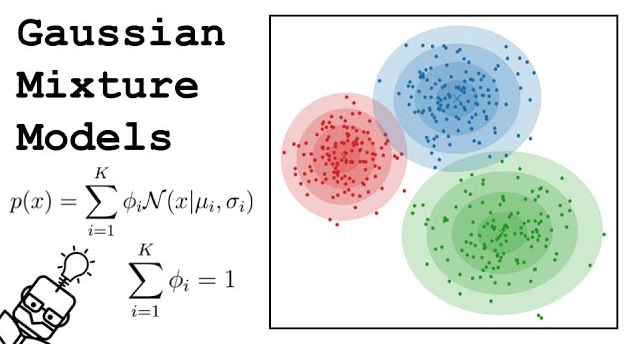

In [3]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [53]:
# Make data
X, y = make_moons(n_samples=100, noise = 0.2, random_state=42)

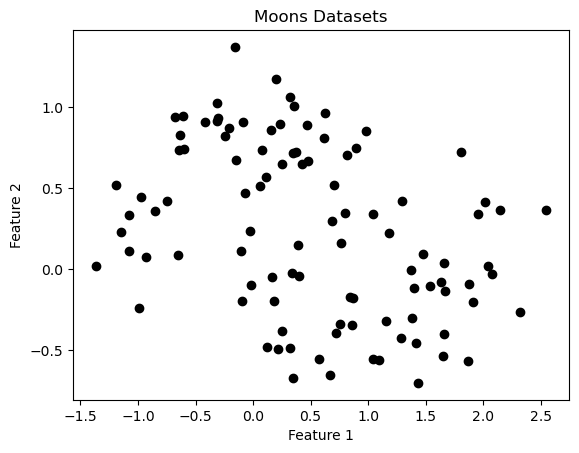

In [54]:
# Visualize 
plt.scatter(X[:,0],X[:,1], color = 'black', marker='o',edgecolors='k')
# plt.scatter(X[y==1][:,0],X[y==1][:,1], color = 'blue', label= 'class 1')
plt.title("Moons Datasets")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
# plt.legend()
plt.show()

### Building a model

In [55]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=42)


In [56]:
# Fitting model
gmm.fit(X)

GaussianMixture(n_components=2, random_state=42)

In [57]:
# Prediction 
y_gmm = gmm.predict(X)

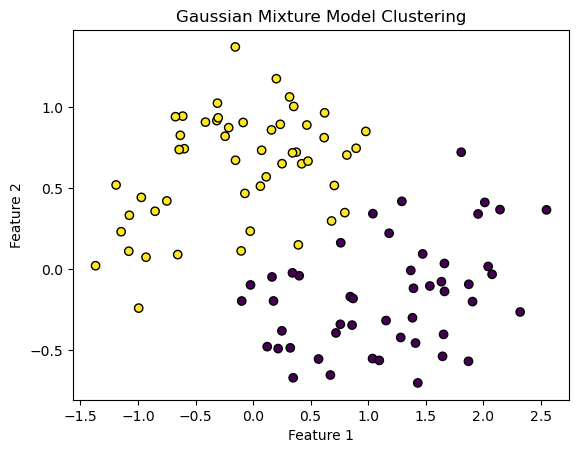

In [58]:
# Visualizing the clustering result
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='viridis', marker='o', edgecolors='k')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## visualizing the Gaussian Matrix and Covariance

In [59]:
def plot_ellipses(gmm, ax = None):
    if ax is None:
        ax = plt.gca()
    for mean, covar in zip(gmm.means_,  gmm.covariances_):
        v, w = np.linalg.eigh(covar) # Eigenvalues and eigenvectors
        x = 2.0* np.sqrt(2.)*np.sqrt(v) # Scaling factor for visualization
        u = w[0]/np.linalg.norm(w[0]) # unit vector for eignevector
        angle = np.arctan(u[1]/u[0])

        # Plotting the ellipses
        angle = np.degrees(angle)
        ax.add_patch(plt.matplotlib.patches.Ellipse(mean, v[0], v[1], angle = angle, 
                                                   edgecolor = 'red', facecolor = 'none', lw= 2))

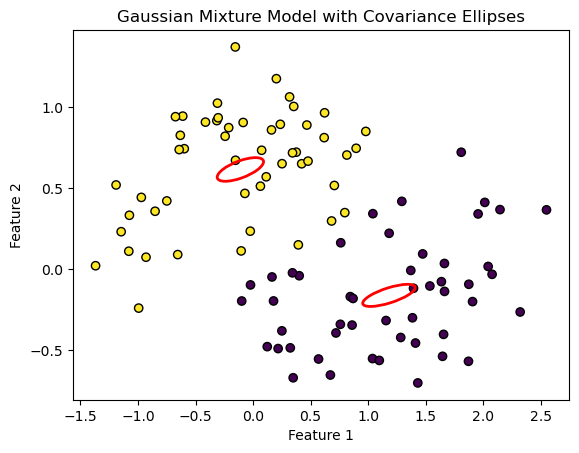

In [60]:
# Plotting the dataset with ellipses
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='viridis', marker='o', edgecolors='k')
plot_ellipses(gmm)
plt.title('Gaussian Mixture Model with Covariance Ellipses')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Understanding the Gaussian Kernel Matrix in Unsupervised Learning

In [61]:
from sklearn.metrics.pairwise import rbf_kernel

gamma = 1. # Gamma PArameter for Kernel matrix
K = rbf_kernel(X, X, gamma)

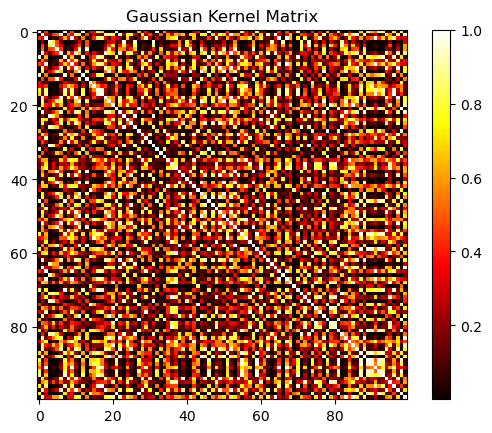

In [62]:
# Visualizing 
plt.imshow(K, cmap = 'hot', interpolation='nearest')
plt.colorbar()
plt.title('Gaussian Kernel Matrix')
plt.show()